<a href="https://colab.research.google.com/github/Shiblu31/CurrenSee/blob/main/CurrenSee_02_streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib

data_dir = "/content/drive/MyDrive/DATASET/Currency/Bd Currency/Custom/Train"
data_dir = pathlib.Path(data_dir)

In [4]:
print(data_dir)

/content/drive/MyDrive/DATASET/Currency/Bd Currency/Custom/Train


In [5]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1272 files belonging to 7 classes.
Using 1018 files for training.


In [6]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1272 files belonging to 7 classes.
Using 254 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['1Hundred', '1Thousands', '2Hundred', '5Hundred', 'Fifty', 'Ten', 'Twenty']


/content/drive/MyDrive/DATASET/Currency/Bd Currency/Custom/Train/Ten/10_127.jpg


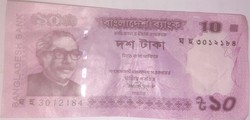

In [8]:
Ten = list(data_dir.glob('Ten/*'))
print(Ten[0])
PIL.Image.open(str(Ten[3]))

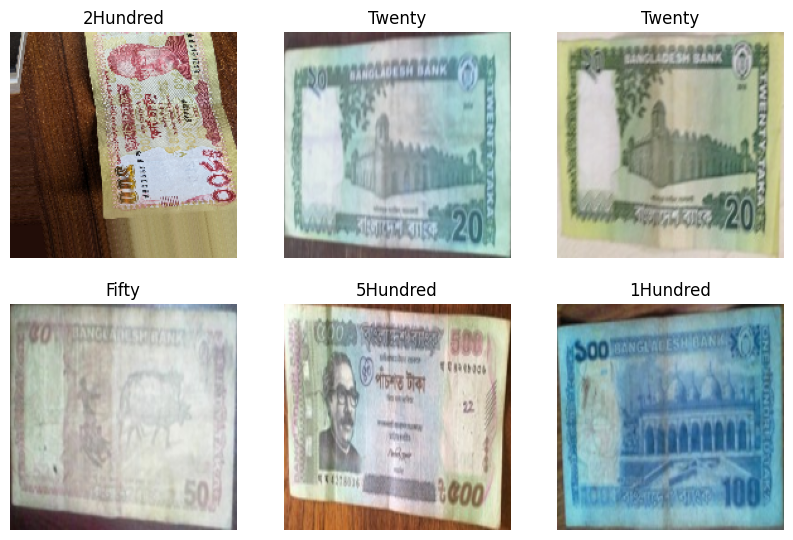

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow as tf
resnet_model = Sequential()


pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(180,180,3),
                                                  pooling='avg',  # Global average pooling
                                                  weights='imagenet')


for layer in pretrained_model.layers:
    layer.trainable = False


resnet_model.add(pretrained_model)


resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
from tensorflow.keras.optimizers import Adam

# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])


In [12]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 274s 8s/step - accuracy: 0.5239 - loss: 1.4242 - val_accuracy: 0.9291 - val_loss: 0.2770
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 69s 413ms/step - accuracy: 0.9736 - loss: 0.1520 - val_accuracy: 0.9685 - val_loss: 0.1378
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 491ms/step - accuracy: 0.9940 - loss: 0.0587 - val_accuracy: 0.9606 - val_loss: 0.1091
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 483ms/step - accuracy: 0.9964 - loss: 0.0348 - val_accuracy: 0.9646 - val_loss: 0.0857
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 413ms/step - accuracy: 1.0000 - loss: 0.0203 - val_accuracy: 0.9724 - val_loss: 0.0714
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 492ms/step - accuracy: 1.0000 - loss: 0.0139 - val_accuracy: 0.9843 - val_loss: 0.0548
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 495ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 0.9764 - val_loss: 0.0566
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 422ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accura

/content/drive/MyDrive/DATASET/Currency/Bd Currency/Custom/Train/Ten/10_127.jpg


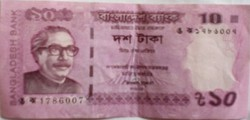

In [13]:
F = list(data_dir.glob('Ten/*'))
print(F[0])
PIL.Image.open(str(F[0]))

In [14]:
import cv2
image=cv2.imread(str(F[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [15]:
pred=resnet_model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[1.6402197e-06 9.5696523e-05 5.1884093e-08 4.3970118e-05 1.4307335e-05
  9.9917275e-01 6.7158061e-04]]


/content/drive/MyDrive/DATASET/Currency/Bd Currency/Custom/Train/Ten/10_127.jpg


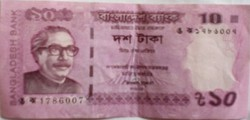

In [16]:
F = list(data_dir.glob('Ten/*'))
print(F[0])
PIL.Image.open(str(F[0]))

In [17]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)


The predicted class is Ten


In [18]:
tf.keras.models.save_model(resnet_model,'my_model2.hdf5')

In [19]:

!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [20]:
output_class=class_names[np.argmax(pred)]

a = "This is currency of "
b = " "+output_class

# Save the values to a file
with open("currency_info.txt", "w") as f:
    f.write(a + " \n")  # Write `a` followed by a newline character
    f.write(b)


In [33]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image, ImageOps
img = Image.open("note1.png")
img = cv2.imread("note1.png")

st.image(
    img ,
    caption = "CurrenSee" ,
    width = 800 ,
    channels = "BGR"
)
# Read the values from the file
with open("currency_info.txt", "r") as f:
    content = f.readlines()

# Ensure there are enough lines in the file
if len(content) >= 2:
    a = content[0].strip()  # Use .strip() to remove any trailing newline characters
    b = content[1].strip()
else:
    a = ""
    b = ""

x = a + b
st.markdown(f"<h3>{x}</h3>", unsafe_allow_html=True)

Overwriting app.py


In [34]:
!pip install pyngrok

In [35]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [36]:
!ngrok authtoken 2jmVWjV80fd02Agj5AgMnLC0Jlw_7jkATQr5DAGgsMKXvcQrL

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [37]:
!nohup streamlit run app.py &
#!streamlit run app.py & npx localtunnel --port 8501

nohup: appending output to 'nohup.out'


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8503
  Network URL: http://172.28.0.12:8503
  External URL: http://34.125.190.18:8503

your url is: https://empty-pugs-shave.loca.lt
